**Loading Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from wordcloud import WordCloud


**Loading Data**

In [ ]:
# Load dataset
df = pd.read_csv("/content/alldata_1_for_kaggle.csv", encoding="latin1")

# Check data
df.head()


,Unnamed: 0,Disease,text
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


**Removing Null Values**

In [ ]:
df = df.dropna()


**Removing Duplicate Records**

In [ ]:
df = df.drop_duplicates()


**Label Encoding (3 Cancer Types)**

In [ ]:
# disease column contains 3 cancer types
le = LabelEncoder()
df['disease_encoded'] = le.fit_transform(df['Disease'])

print(le.classes_)   # Shows mapping of cancer types


['Colon_Cancer' 'Lung_Cancer' 'Thyroid_Cancer']


**Text Cleaning & NLP Preprocessing**

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['processed_text'] = df['text'].apply(clean_text)

df[['text', 'processed_text']].head()


,text,processed_text
0,Thyroid surgery in children in a single insti...,thyroid surgery in children in a single instit...
1,""" The adopted strategy was the same as that us...",the adopted strategy was the same as that used...
2,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ïbri...
3,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp of the skull is an un...
4,This study aimed to investigate serum matrix ...,this study aimed to investigate serum matrix m...


**WordCloud for Each Cancer Type**


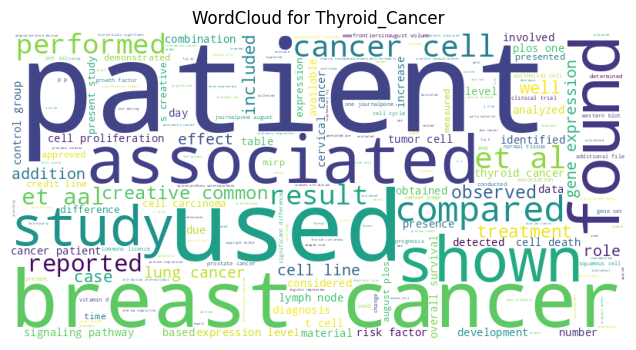

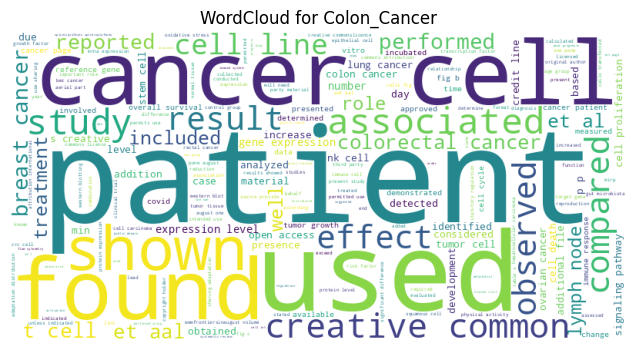

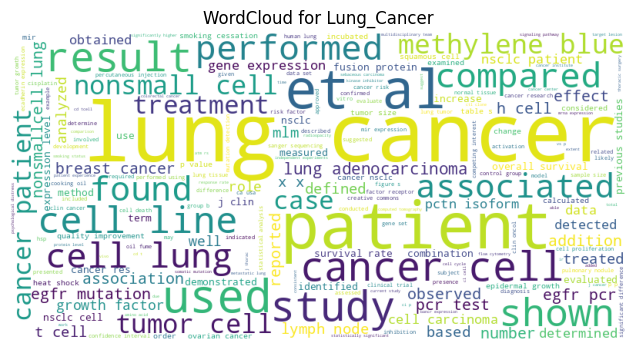

In [ ]:
 cancer_types = df['Disease'].unique()

for cancer in cancer_types:
    cancer_text = " ".join(
        df[df['Disease'] == cancer]['processed_text']
    )

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white"
    ).generate(cancer_text)

    plt.figure(figsize=(8,4))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"WordCloud for {cancer}")
    plt.show()


 **TF-IDF + Model using Pipeline**

In [ ]:
X = df['processed_text']
y = df['disease_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        max_features=5000
    )),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('classifier', LogisticRegression(max_iter=1000))])

**Model Evaluation**

In [ ]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9392338177014531

Classification Report:

                precision    recall  f1-score   support

  Colon_Cancer       0.90      0.93      0.91       517
   Lung_Cancer       1.00      1.00      1.00       407
Thyroid_Cancer       0.93      0.91      0.92       590

      accuracy                           0.94      1514
     macro avg       0.94      0.94      0.94      1514
  weighted avg       0.94      0.94      0.94      1514



**Predict a Manual Sentence (After Model Training)**

In [ ]:
# Manual input sentence
manual_text = "The patient shows abnormal cell growth and tumor formation in the lungs"
manual_text_cleaned = clean_text(manual_text)
predicted_label = pipeline.predict([manual_text_cleaned])[0]
predicted_disease = le.inverse_transform([predicted_label])[0]
print("Predicted Cancer Type:", predicted_disease)


Predicted Cancer Type: Colon_Cancer
